In [84]:
import glob, os
import matplotlib as mpl
import numpy as np
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt
mpl.rcParams['figure.dpi']= 200

#files = glob.glob(r'/home/tb829/project/purity-monitor/Jupyter/Log/data4/*')
files = glob.glob('/home/tb829/data/*')

frequencies = {}
fre_volts = {}

for f in files:
    if not 'backup' in f:
        filename = os.path.split(f)[1]
        voltage = float(filename.split('@')[0])
        frequency = float(filename.split('@')[1].split('.txt')[0])
        
        with open(f,'r') as opened:
            lines = opened.readlines()
            for line in lines:
                if len(line) == 0: continue
                key = line.split(':(')[0][1:-2]
                bins = int(key.split(',')[0])
                #prominence = int(key.split(',')[1])
                value = line.split(':(')[1]
                #voltage = float(filename.split('@')[0])
                #frequency = float(filename.split('@')[1].split('.txt')[0])
                if frequency == 0.00:
                    print(filename)
                    print(line)
                gain = float(value.split(',')[0])
                error = float(value.split(',')[1][:-2])
                if not frequency in list(fre_volts.keys()): fre_volts[frequency] = []
                if voltage in fre_volts[frequency]:
                    print(f'Voltage {voltage} for {frequency} already exists')
                fre_volts[frequency].append(voltage)
                if not frequency in list(frequencies.keys()): frequencies[frequency] = []
                frequencies[frequency].append((voltage, (gain,error,bins)))

                #plt.scatter([voltage],[gain],30,c='red',marker='*')
    #plt.clf()
                
frequencies_un = np.unique(list(frequencies.keys()))
print(frequencies_un)
#with open(f'{voltage}@{frequency}.txt','w') as f:

[ 0.5  0.6  0.7  0.8  0.9  1.   2.   5.   7.  10. ]


(0.0, 10.0)
(0.993248, 0.906157, 0.143936, 1.0)


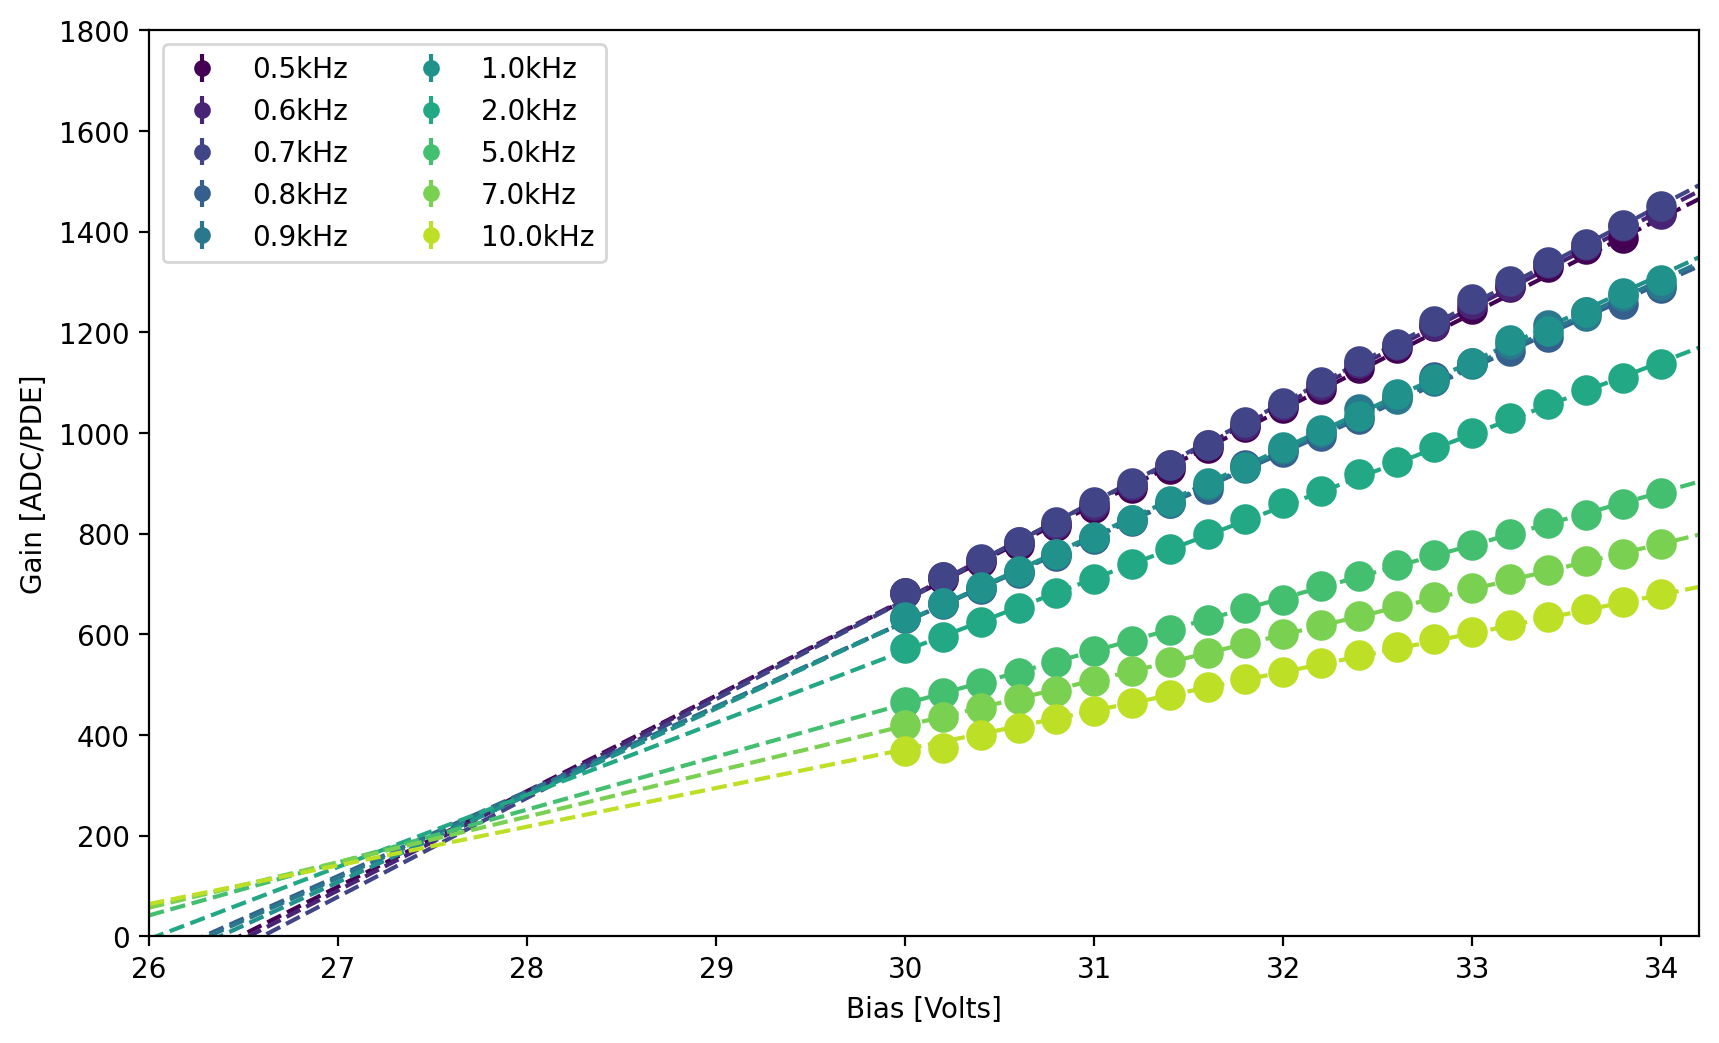

In [85]:
colors = ['slateblue', 'green', 'brown', 'yellow', 'red', 'blue', 'navy','magenta','orange','purple']
import matplotlib.colors as colors
import matplotlib.cm as cmx

cm = plt.get_cmap('viridis')
norm = colors.Normalize(0,len(frequencies_un))
scalarMap = cmx.ScalarMappable(norm=norm, cmap=cm)
print(scalarMap.get_clim())
print(scalarMap.to_rgba(10))

def line(x,a,b): return a*(x-b)
plt.figure(facecolor='white',figsize=(10,6))
final_v = []
for ii, freq in enumerate(frequencies_un):
    values = frequencies[freq]
    #color = colors[ii]
    voltages = []
    gains = []
    errors = []
    for value in values:
        #print(value)
        voltage, data_val = value
        gain, error, bins = data_val
        #if freq == 10.0 and voltage < 31.8: continue
        #if freq == 7.0 and voltage < 31.0: continue
        #if freq == 5.0 and voltage < 30.4: continue
        #if voltage == 32.4: gain = 578*5
        if voltage in voltages:
            index = np.argwhere(np.asarray(voltages) == voltage)[0][0]
            old_err = errors[index]
            if gains[index] == gain: continue
            print(f'{voltage} already looped',end=' ')
            print(f'OLD GAIN {gains[index]} vs new {gain}')
            if error > old_err:
                print(f'{error} > {old_err} --> SKIPPED')
                continue
            else:
                gains[index] = gain
                errors[index] = error
                print(f'{error} < {old_err} --> REBASED')
                continue
        voltages.append(voltage)
        gains.append(gain)
        errors.append(error)
        #print(f'{voltage}@{freq} -> {gain} and {error}')
    final_v = voltages
    if len(gains) == 0:
        print(freq,' : ',voltage)
        print(values)

    plt.errorbar(voltages,gains,yerr=errors,fmt='o',ms=10,color=scalarMap.to_rgba(ii),label=str(freq)+'kHz')
    try: popt,pcov = curve_fit(line,voltages,gains,sigma=errors,maxfev=1000000)
    except: continue
    plt.plot(np.arange(26,34.6,0.2),line(np.arange(26,34.6,0.2),*popt),color=scalarMap.to_rgba(ii),ls='--')
    #print(f'{freq:.02f}kHz ->  {popt[0]:.5f} ± {np.sqrt(np.abs(np.diag(pcov)))[1]:.5f}      ({color})')
    #plt.xticks(np.unique(voltages))
    
plt.legend(loc='upper left',markerscale=0.5,ncol=2)
plt.xlabel('Bias [Volts]')
plt.ylabel('Gain [ADC/PDE]')
plt.xlim(26,34.2)
plt.ylim(0,1800)
plt.savefig(f'plots/final_pre_{ii}.png')
plt.show()

In [37]:
#plt.figure(facecolor='white',figsize=(10,10))
plt.figure(facecolor='white')

final_all = [0]*len(frequencies_un)

for ii,f in enumerate(final_all):
    f = [1]*len(final_v)

print(final_all)
sys.exit()

for ii, freq in enumerate(frequencies_un):
    values = frequencies[freq]
    color = colors[ii]
    voltages = []
    gains = []
    errors = []
    for value in values:
        #print(value)
        voltage, data_val = value
        gain, error, bins = data_val
        #if freq == 10.0 and voltage < 31.8: continue
        #if freq == 7.0 and voltage < 31.0: continue
        #if freq == 5.0 and voltage < 30.4: continue
        #if voltage == 32.4: gain = 578*5
        if voltage in voltages:
            index = np.argwhere(np.asarray(voltages) == voltage)[0][0]
            old_err = errors[index]
            if gains[index] == gain: continue
            print(f'{voltage} already looped',end=' ')
            print(f'OLD GAIN {gains[index]} vs new {gain}')
            if error > old_err:
                print(f'{error} > {old_err} --> SKIPPED')
                continue
            else:
                gains[index] = gain
                errors[index] = error
                print(f'{error} < {old_err} --> REBASED')
                continue
        voltages.append(voltage)
        gains.append(gain)
        errors.append(error)

        final_all[ii] = None

        print(f'{voltage}@{freq} -> {gain} and {error}')
    if len(gains) == 0:
        print(freq,' : ',voltage)
        print(values)

    plt.errorbar(voltages,gains,yerr=errors,fmt='o',ms=10,color=color)
    try: popt,pcov = curve_fit(line,voltages,gains,sigma=errors,maxfev=1000000)
    except: continue
    plt.plot(voltages,line(voltages,*popt),color=color,label=str(freq)+'kHz')
    #print(f'{freq:.02f}kHz ->  {popt[0]:.5f} ± {np.sqrt(np.abs(np.diag(pcov)))[1]:.5f}      ({color})')
    #plt.xticks(np.unique(voltages))
    
plt.legend(loc='upper left')
plt.xlabel('[volts]')
#plt.savefig(r'/Users/Tizi/Desktop/plotter.png')
plt.show()

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


NameError: name 'sys' is not defined

<Figure size 1200x800 with 0 Axes>